### Cross Validation Task

### 약물 A, B, C, X, Y
##### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 c, 약물 x 및 y 중 하나에 반응했다.
-  미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

##### feature
- Age: 환자의 나이
- Sex: 환자의 성별
- BP: 혈압
- Cholesterol: 콜레스테롤 수치
- Na_to_K: 나트륨-칼륨

##### target
- Drug: 의약품, 환자에게 효과가 있었던 약

In [1]:
import pandas as pd

In [2]:
# 데이터 세트 호출
drug_df = pd.read_csv('./datasets/drugs.csv')
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### Ⅰ. 데이터 탐색

#### 📊 데이터 정보

In [3]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
drug_df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [5]:
drug_df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [6]:
drug_df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

### Ⅱ. 데이터 전처리

In [7]:
drug_up_df = drug_df.copy()

#### 📊 결측치 확인

In [8]:
drug_df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#### 📊 이상치 제거
데이터 세트에서 나트륨-칼륨의 이상치를 제거

In [9]:
# 나트륨-칼륨 피처만 따로 가져와 새로운 데이터 프레임에 담기
na_to_k_df = drug_df.loc[:, 'Na_to_K'].reset_index()
na_to_k_df

,index,Na_to_K
0,0,25.355
1,1,13.093
2,2,10.114
3,3,7.798
4,4,18.043
...,...,...
195,195,11.567
196,196,12.006
197,197,9.894
198,198,14.020


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# 데이터의 특성을 변경
# 평균 0이고 표준편차 1인 분포로 변환
std = StandardScaler()

In [12]:
# 해당하는 피처의 특성을 변경하여, 데이터를 표준화 하고 값을 담기
std_na_to_k = std.fit_transform(na_to_k_df[['Na_to_K']])
std_na_to_k

array([[ 1.28652212],
       [-0.4151454 ],
       [-0.82855818],
       [-1.14996267],
       [ 0.27179427],
       [-1.03769314],
       [ 0.02643885],
       [-0.70046821],
       [-0.12676951],
       [ 0.45567206],
       [-0.59916196],
       [ 0.43221897],
       [-0.09832049],
       [ 0.674105  ],
       [-0.46926791],
       [-0.0788919 ],
       [-0.64245998],
       [-0.29316156],
       [-1.21935052],
       [ 1.37242427],
       [ 0.42236589],
       [ 1.36451406],
       [ 2.00995979],
       [-0.14550423],
       [ 2.41490725],
       [ 0.37809645],
       [ 1.9819271 ],
       [-0.93028076],
       [ 0.91765633],
       [ 0.25902691],
       [-1.01784822],
       [-0.90446848],
       [-0.70366006],
       [ 2.19147839],
       [-0.27081868],
       [-1.2211546 ],
       [-0.92139911],
       [-0.29787994],
       [-0.88476233],
       [-0.97149714],
       [ 0.43527203],
       [-0.25610845],
       [-0.04086736],
       [-0.53074555],
       [-0.5258884 ],
       [-1

In [13]:
# 표준화된 값으로 변경하기
na_to_k_df['Na_to_K'] = std_na_to_k
na_to_k_df

,index,Na_to_K
0,0,1.286522
1,1,-0.415145
2,2,-0.828558
3,3,-1.149963
4,4,0.271794
...,...,...
195,195,-0.626917
196,196,-0.565995
197,197,-0.859089
198,198,-0.286500


In [14]:
# na_to_k_df = na_to_k_df[na_to_k_df['Na_to_K'].between(-1.96, 1.96)]

In [15]:
# 이상치 제거 조건 설정
con1 = na_to_k_df['Na_to_K'] >= -1.96
con2 = na_to_k_df['Na_to_K'] <= 1.96
cond = con1 & con2

In [16]:
# 이상치가 제거된 데이터의 인덱스 번호를 가져와 기존 데이터 프레임에서 문제가 없는 데이터들만 남겨주기
drug_up_df = drug_up_df.iloc[na_to_k_df[cond].index].reset_index(drop=True)
drug_up_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
183,56,F,LOW,HIGH,11.567,drugC
184,16,M,LOW,HIGH,12.006,drugC
185,52,M,NORMAL,HIGH,9.894,drugX
186,23,M,NORMAL,NORMAL,14.020,drugX


#### 📊 데이터 값 문자열 변경(라벨 적용)

In [17]:
drug_en_df = drug_up_df.copy()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# 문자열이나 정수로 표현된 범주형 데이터를 숫자로 변환
drug_encoder = LabelEncoder()
targets = drug_encoder.fit_transform(drug_up_df['Drug'].tolist())
drug_en_df['Drug'] = targets

gender_encoder = LabelEncoder()
gender_encoder = gender_encoder.fit_transform(drug_up_df['Sex'].tolist())
drug_en_df['Sex'] = gender_encoder

bp_encoder = LabelEncoder()
bp_encoder = bp_encoder.fit_transform(drug_up_df['BP'].tolist())
drug_en_df['BP'] = bp_encoder

cholesterol_encoder = LabelEncoder()
cholesterol_encoder = cholesterol_encoder.fit_transform(drug_up_df['Cholesterol'].tolist())
drug_en_df['Cholesterol'] = cholesterol_encoder

In [20]:
# 학습된 모델의 클래스 확인 (원래 값의 배열 제공)
drug_encoder.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype='<U5')

In [21]:
# 정수로 인코딩된 데이를 원래의 데이터 값으로 다시 형변환
drug_encoder.inverse_transform(drug_en_df['Drug'])

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugB', 'drugX', 'drugX', 'drugX', 'drugA', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugB', 'drugY', 'drugX', 'drugX', 'drugX',
       'drugA', 'drugC', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugC', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugY', 'drugX', 'drugB', 'drugY', 'drugA', 'drugX',
       'drugY', 'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugA', 'drugY', 'drugA', 'drugX', 'drugB', 'drugX',
       'drugC', 'drugA', 'drugC', 'drugB', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugA', 'drugA', 'drugC', 'drugX', 'drugY',
       'drugX', 'dru

In [22]:
drug_en_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
183,56,0,1,0,11.567,2
184,16,1,1,0,12.006,2
185,52,1,2,0,9.894,3
186,23,1,2,1,14.020,3


### Ⅲ. 데이터 세트 분리

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

#### 📊 데이터 세트 분리

In [24]:
# 분류 모델 가져와 담기
dtc = DecisionTreeClassifier()

In [25]:
# 피처와 타겟 데이터 분리
features, targets = drug_en_df.iloc[:, :-1], drug_en_df.iloc[:, -1]

In [26]:
# 문제/정답, 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

### Ⅳ. 데이터 학습 및 교차 검증

#### 📊 데이터 학습 및 교차 검증 설정

In [27]:
# 파라미터 값 조정 (결정 트리 확인하여 조정)
# max_depth: 의사 결정 트리의 최대 깊이 지정
# min_samples_split: 노드를 분할하기 위해 필요한 최소 샘플 수
parameters = {'max_depth': [3, 4, 5], 'min_samples_split': [15, 16, 17]}

In [28]:
# 교차 검증 설정하기
g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

#### 📊 데이터 학습 및 교차 검증

In [29]:
# 데이터 학습
g_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [15, 16, 17]},
             return_train_score=True)

In [30]:
# 그리드 서치를 통해 얻은 결과 확인
g_dtc.cv_results_

{'mean_fit_time': array([0.00607924, 0.00310621, 0.0093749 , 0.00937543, 0.00312457,
        0.00937715, 0.01107373, 0.00641842, 0.00163312]),
 'std_fit_time': array([0.00583831, 0.0038844 , 0.00765458, 0.00765501, 0.00624914,
        0.00765641, 0.00664654, 0.00589518, 0.00326624]),
 'mean_score_time': array([0.00424724, 0.00312495, 0.00312448, 0.00312467, 0.        ,
        0.00312123, 0.00072694, 0.        , 0.00472345]),
 'std_score_time': array([0.00608976, 0.0062499 , 0.00624895, 0.00624933, 0.        ,
        0.00624247, 0.00119102, 0.        , 0.00626784]),
 'param_max_depth': masked_array(data=[3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[15, 16, 17, 15, 16, 17, 15, 16, 17],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_va

In [31]:
# 데이터 프레임으로 변환하여 확인
result_df = pd.DataFrame(g_dtc.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006079,0.005838,0.004247,0.006090,3,15,"{'max_depth': 3, 'min_samples_split': 15}",0.8,0.9,0.9,...,0.873333,0.048990,7,0.916667,0.916667,0.908333,0.933333,0.908333,0.916667,0.009129
1,0.003106,0.003884,0.003125,0.006250,3,16,"{'max_depth': 3, 'min_samples_split': 16}",0.8,0.9,0.9,...,0.873333,0.048990,7,0.916667,0.916667,0.908333,0.933333,0.908333,0.916667,0.009129
2,0.009375,0.007655,0.003124,0.006249,3,17,"{'max_depth': 3, 'min_samples_split': 17}",0.8,0.9,0.9,...,0.873333,0.048990,7,0.916667,0.916667,0.908333,0.933333,0.908333,0.916667,0.009129
3,0.009375,0.007655,0.003125,0.006249,4,15,"{'max_depth': 4, 'min_samples_split': 15}",1.0,1.0,1.0,...,0.993333,0.013333,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.003125,0.006249,0.000000,0.000000,4,16,"{'max_depth': 4, 'min_samples_split': 16}",1.0,1.0,1.0,...,0.993333,0.013333,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.009377,0.007656,0.003121,0.006242,4,17,"{'max_depth': 4, 'min_samples_split': 17}",1.0,1.0,1.0,...,0.993333,0.013333,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.011074,0.006647,0.000727,0.001191,5,15,"{'max_depth': 5, 'min_samples_split': 15}",1.0,1.0,1.0,...,0.993333,0.013333,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.006418,0.005895,0.000000,0.000000,5,16,"{'max_depth': 5, 'min_samples_split': 16}",1.0,1.0,1.0,...,0.993333,0.013333,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.001633,0.003266,0.004723,0.006268,5,17,"{'max_depth': 5, 'min_samples_split': 17}",1.0,1.0,1.0,...,0.993333,0.013333,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [32]:
# g_dtc.best_params_: 최적의 하이퍼파라미터 조합을 나타내는 딕셔너리
# g_dtc.best_score_: 해당 하이퍼파라미터 조합에 대한 평균 테스트 점수
print(g_dtc.best_params_, g_dtc.best_score_, sep="\n")

{'max_depth': 4, 'min_samples_split': 15}
0.9933333333333334


### Ⅴ. 데이터 예측

#### 📊 데이터 예측

In [33]:
# 학습된 모델 담기
dtc = g_dtc.best_estimator_
# 예측
prediction = dtc.predict(X_test)

### Ⅵ. 데이터 평가

#### 📊 데이터 평가

In [34]:
# 평가
accuracy_score(y_test, prediction)

0.9736842105263158

#### 📊 피처 및 타겟 관계 탐색

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [37]:
# 일부 피처 가져오기
features_2_4 = features.iloc[:, [2, 4]]

C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


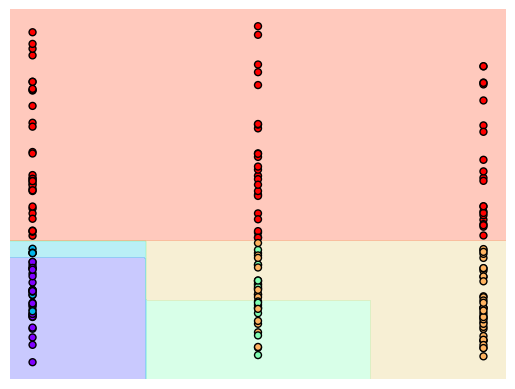

In [38]:
# 일부 피처와 타겟 관계를 산점도로 나타내기
visualize_boundary(dtc, features_2_4, targets)